In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest5.csv")
df.head(20)

,question_id,student_answer,score
0,5,الانجيل,1
1,5,الانجيل,1
2,5,الإنجيل,1
3,5,الانجيل,1
4,5,الإنجيل,1
5,5,التوراة,0
6,5,مانجا,0
7,5,الزابور,0
8,5,الانجيل,1
9,5,الانجيل,1


In [116]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     107 non-null    int64 
 1   student_answer  107 non-null    object
 2   score           107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [117]:
df.groupby('score').size()

score
0    27
1    80
dtype: int64

In [118]:
df.duplicated().sum()

92

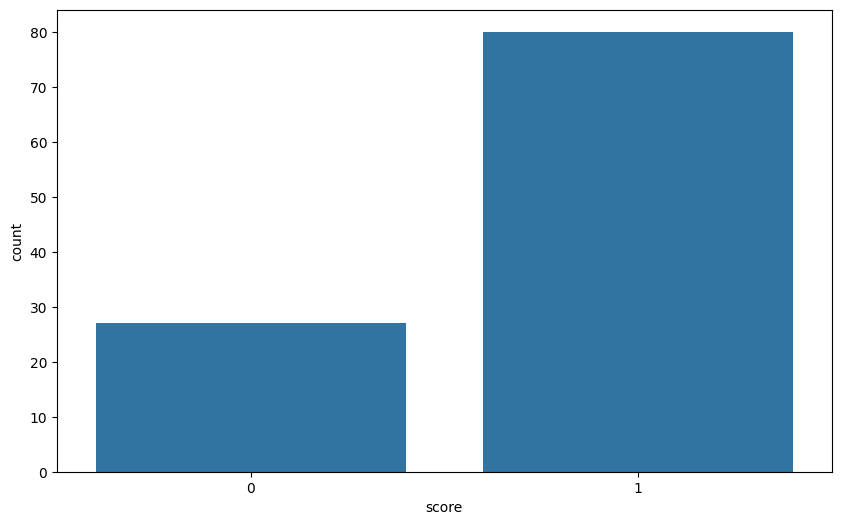

In [119]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [120]:
import pandas as pd
df = pd.read_csv('./quest5.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 5 ))
csv = './question5.csv'
df2.to_csv(csv,index=False)
print(len(df1))

15


In [121]:
df = pd.read_csv("question5.csv")
df.head(20)

,question_id,student_answer,score
0,5,الانجيل,5
1,5,الإنجيل,5
2,5,الانجيل,5
3,5,التوراة,0
4,5,مانجا,0
5,5,الزابور,0
6,5,الإنجيل,5
7,5,التوراة,0
8,5,الكتاب المنزل على عيسى عليه السلام هو الإنجيل,5
9,5,الزابور,0


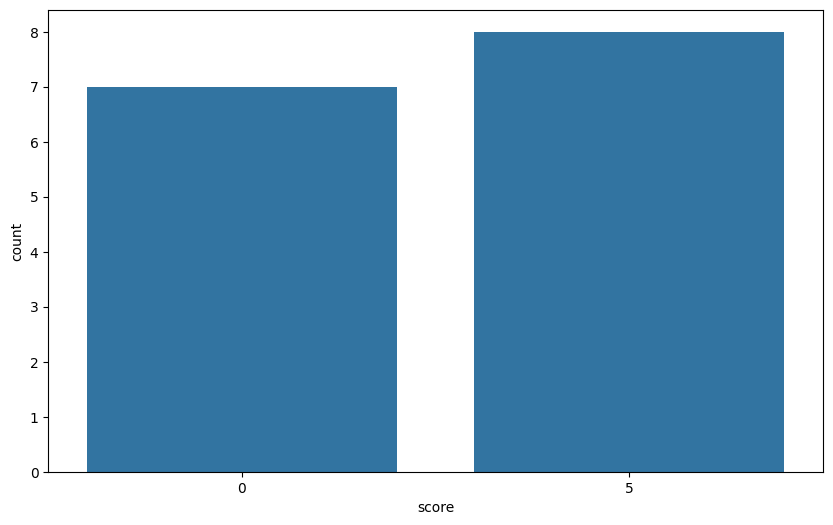

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [123]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [124]:
import nltk
from nltk.tokenize import word_tokenize

In [125]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [126]:
from gensim.models import Word2Vec

In [127]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [128]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [129]:
df.head(5)

,question_id,student_answer,score,tokens,textvector
0,5,الانجيل,5,[الانجيل],"[-0.0019442164, -0.0052675214, 0.009447114, -0..."
1,5,الإنجيل,5,[الإنجيل],"[-0.0005392735, 0.00023151991, 0.00510105, 0.0..."
2,5,الانجيل,5,[الانجيل],"[-0.0019442164, -0.0052675214, 0.009447114, -0..."
3,5,التوراة,0,[التوراة],"[0.007088797, -0.00156793, 0.007947499, -0.009..."
4,5,مانجا,0,[مانجا],"[0.0013001668, -0.009804303, 0.0045877625, -0...."
